# Getting started

Requires **HyperSpy 1.3 or above**

## Summary

This tutorial shows how to load, save and visualise data with HyperSpy as well as other basic functionalities.

Although not strictly required, some knowledge of Python can help with getting the most out of HyperSpy. If you are new to Python, the [official tutorial](https://docs.python.org/2/tutorial/index.html) is an excellent way to start.

This tutorial can be enjoyed interactively thanks to the [Jupyter Notebook](http://jupyter.org) and [IPython](http://ipython.org). If you are not familiar with the Jupyter Notebook, having a look at the `Help` menu above and the [IPython documentation](http://ipython.readthedocs.io/en/stable/interactive/index.html) is highly recommended.

To save this webpage as an interactively useable IPython notebook, click on the "download" icon at the top-right of the webpage and save the resulting code with the suffix ".ipynb" (this should be proposed by default). If Hyperspy has been installed, the notebook can then be launched by double-clicking the saved file (Mac and Linux) or right-clicking the folder containing the file (Windows) and then clicking again on the notebook filename in the tab that will have opened in your browser. This will open another tab containing the interactive version of this page.

Important note: in the Jupyter notebook, to execute a command or group of commands in a cell, place the cursor in the cell and press 'shift+return'.

### Credits and changes

* 22/8/2016 Michael Walls. Include some more comments and explanations
* 9/8/2016 Francisco de la Peña. Update it for HyperSpy 1.1
* 27/7/2016 Francisco de la Peña. Update it for HyperSpy 1.0.1.
* 6/3/2016 Francisco de la Peña. Adapted from previous tutorials for the SCANDEM workshop.

## Table of Contents

1. [Importing HyperSpy](#1.-Importing-HyperSpy)
2. [Getting help](#2.-Getting-help)
3. [Structure overview](#3.-Structure-overview)
4. [Loading data from a file](#4.-Loading-data-from-a-file)
5. [Axis properties](#5.-Axis-properties)
6. [Visualisation](#6.-Visualisation)
7. [Signal and navigation axes](#7.-Signal-and-navigation-axes)
8. [Saving to file](#8.-Saving-to-file)
9. [Indexing](#9.-Indexing)
10. [Process with external function](#10.-Process-with-external-function)


**IMPORTANT:** Before you start, create/download the datasets executing the code in the [Appendix](#Appendix).

## 1. Importing HyperSpy

As with any other Python library, to use HyperSpy, you first need to "import" it. The public HyperSpy API can be imported via

    import hyperspy.api as hs
    
However, in order to enable interactive plotting in IPython we need to activate the matplotlib "backend" first using the [%matplotlib IPython magic](http://ipython.readthedocs.io/en/stable/interactive/plotting.html).

**NOTE:** A "backend" in this context refers to the code, that determines in which way plotted data will be displayed. In the online version of this document we use the `inline` backend that displays non-interactive figures inside the Jupyter Notebook. However, for interactive data analysis purposes most would prefer to use the `qt4`, `wx` or `nbagg` backends. 
    
 

In [1]:
# This is a Python comment line - anything after a hashtag is a non-executed comment
%matplotlib nbagg 
# You can replace 'nbagg' with any other available toolkit e.g 'qt4', 'tk'...
import hyperspy.api as hs
# Don't worry about the warning below, they're just for information

## 2. Getting help

HyperSpy documentation includes

* The [Use Guide](http://hyperspy.org/hyperspy-doc/current/index.html)
* The docstrings (see below)
* The [demos](http://nbviewer.jupyter.org/github/hyperspy/hyperspy-demos/tree/master/) such as this one.


### Docstrings

In Python most objects include their own documentation  (docstring in Python jargon). In the Jupyter notebook you can consult the documentation interactively by:

* Adding a question mark to the object, e.g. load?
* If the object is a function or a method, by pressing the ``Shift + Tab`` keys after writing the first brackets, e.g. load(&lt;``Shift + Tab``>


All HyperSpy public objects are contained in the ``hs`` variable that we have imported above. Let's practice the different methods to access the docstrings by inspecting the ``hs`` doctring:

In [2]:
hs?

The `dir` function is very helpful to inspect the attributes of Python objects

In [2]:
dir(hs)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_logger',
 'datasets',
 'eds',
 'get_configuration_directory_path',
 'hyperspy',
 'hyperspy_gui_ipywidgets',
 'hyperspy_gui_traitsui',
 'interactive',
 'load',
 'logging',
 'markers',
 'material',
 'model',
 'model_selection',
 'plot',
 'preferences',
 'roi',
 'samfire',
 'set_log_level',
 'signals',
 'stack',
 'transpose']

## 3. Structure overview

HyperSpy provides (among other things):
* A collection of "signals" which are specialised data containers with functions (methods in Python jargon) that operate on the data. They can be found in ``hs.signals``.
* Functions that operate on the signals. For example ``hs.stack`` to stack signals and the several functions in ``hs.plot``.
* A collection of "model" classes that generate models (usually for fitting) by linearly combining the components in ``hs.model.components``.
* A database of chemical elements with EELS ionisation edges and X-ray lines in ``hs.material``.
* Some example data in `hs.datasets`

In [3]:
dir(hs.signals)

['BaseSignal',
 'ComplexSignal',
 'ComplexSignal1D',
 'ComplexSignal2D',
 'DielectricFunction',
 'EDSSEMSpectrum',
 'EDSTEMSpectrum',
 'EELSSpectrum',
 'HologramImage',
 'Signal1D',
 'Signal2D',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__']

To create a HyperSpy signal, just pass some data to one of the signals in ``hs.signals`` e.g.

In [4]:
ten = hs.signals.Signal1D([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

Now the `ten` variable contains a `Signal1D` instance.

Note that, thanks to [IPython](http://ipython.readthedocs.io/en/stable/interactive/tutorial.html#tab-completion), there is no need to type all the commands or paths manually—it is enough to write the first letters and press the `Tab` key.

In [5]:
ten

<Signal1D, title: , dimensions: (|10)>

Most of the operations that we can perform on the data are available inside this object, and can be accessed by writing a *dot* i.e. **.** after the name of the variable, pressing the ``Tab`` key and choosing an option from the list that appears. Alternatively, use the `dir` function to print them all.

In [6]:
dir(ten)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_wrap__',
 '__call__',
 '__class__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__next__',
 '__or__',
 '__pos__',
 '__pow__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rshift__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '__xor__',
 '_additional_slicing_targets',
 '_alias_signal_types',
 '_apply_function_on_data_and_remove_axis',
 '_assign_subclass',
 '_auto_

For example:

In [7]:
ten.print_summary_statistics()

Summary statistics
------------------
mean:	5.500
std:	2.872

min:	1.000
Q1:	3.250
median:	5.500
Q3:	7.750
max:	10.000


### Very useful tip: "Autocompletion"

In fact, long commands like the previous one can be entered more quickly using the ``tab`` key. Just enter the first few letters of the command, press ``tab`` and a list of the possible commands will appear. Navigate to the required command with the arrow keys (you still need the brackets at the end). If you are in interactive mode, try it in the cell below:

In [ ]:
ten.p

## 4. Loading data from a file

More typically we load data from files using the `hs.load` function. The following code loads the ``CL1.rpl`` file in the ``machine_learning`` folder and stores it in the `s` variable. If you haven't already, download the required machine learning example data in the [Appendix](#Appendix).

In [9]:
s = hs.load("machine_learning/CL1.hdf5")

Let's check what is inside the `s` variable

In [10]:
s

<EELSSpectrum, title: , dimensions: (64, 64|1024)>

HyperSpy has loaded the data into an EELSSpectrum object that we have stored in the *s* variable. The symbol | separates the navigation dimensions *x*, *y* and the signal dimensions, in this case *energy loss*.


The metadata read from the file is stored in the ``original_metadata`` attribute.

In [11]:
s.original_metadata

├── beam-energy = 100.0
├── byte-order = dont-care
├── collection-angle = 10.0
├── convergence-angle = 7.0
├── data-length = 8
├── data-type = float
├── depth = 1024
├── depth-name = EnergyLoss
├── depth-origin = 100.0
├── depth-scale = 0.5
├── depth-units = eV
├── ev-per-chan = 1.0
├── height = 64
├── height-name = Y
├── height-origin = 0.0
├── height-scale = 1.0
├── height-units = cm
├── key = value
├── offset = 0
├── record-by = vector
├── signal = EELS
├── width = 64
├── width-name = X
├── width-origin = 0.0
├── width-scale = 1.0
└── width-units = cm

Part of this information is also available in the ``metadata`` attribute. Internally, HyperSpy only uses the information in ``metadata``.

In [12]:
s.metadata

├── Acquisition_instrument
│   └── TEM
│       ├── Detector
│       │   └── EELS
│       │       └── collection_angle = 10.0
│       ├── beam_energy = 100.0
│       └── convergence_angle = 7.0
├── General
│   ├── original_filename = CL1.rpl
│   └── title = 
└── Signal
    ├── binned = True
    ├── signal_origin = 
    └── signal_type = EELS

The metadata can be easily modified:

In [13]:
s.metadata.Acquisition_instrument.TEM.convergence_angle = 10

In [14]:
s.metadata

├── Acquisition_instrument
│   └── TEM
│       ├── Detector
│       │   └── EELS
│       │       └── collection_angle = 10.0
│       ├── beam_energy = 100.0
│       └── convergence_angle = 10
├── General
│   ├── original_filename = CL1.rpl
│   └── title = 
└── Signal
    ├── binned = True
    ├── signal_origin = 
    └── signal_type = EELS

## 5. Axis properties

The axes are stored in the `axes_manager` attribute:

In [15]:
s.axes_manager

<Axes manager, axes: (64, 64|1024)>
            Name |   size |  index |  offset |   scale |  units 
================ | ====== | ====== | ======= | ======= | ====== 
               X |     64 |      0 |       0 |       1 |     cm 
               Y |     64 |      0 |       0 |       1 |     cm 
---------------- | ------ | ------ | ------- | ------- | ------ 
      EnergyLoss |   1024 |        |   1e+02 |     0.5 |     eV

The `AxesManager` can be indexed:

In [16]:
s.axes_manager[0]

<X axis, size: 64, index: 0>

It is also possible to access the axes by name:

In [17]:
s.axes_manager["EnergyLoss"]

<EnergyLoss axis, size: 1024>

The axes have `offset`, `scale`, `units` and `name` attributes

In [18]:
s.axes_manager["EnergyLoss"].scale

0.5

In [19]:
s.axes_manager["EnergyLoss"].units

'eV'

## 6. Visualisation

<IPython.core.display.Javascript object>


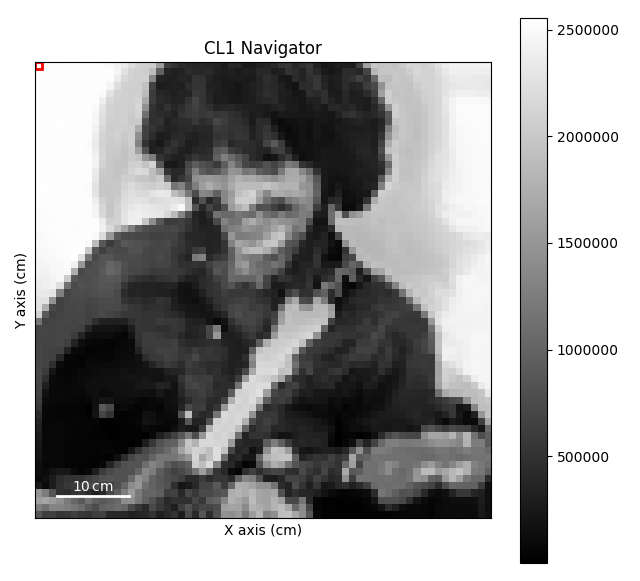

<IPython.core.display.Javascript object>


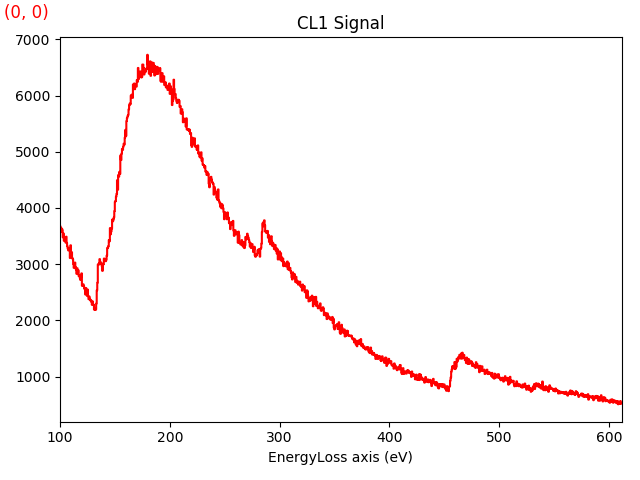

In [20]:
s.plot()

### Moving around 

* Using the keyboard arrow keys
* Using the pointer

### Other shortcuts


* Two pointers: enable/disable by pressing **e**
* Adjust image contrast:  press **h**
* Increase/decrease the pointer size: **+** and **-** keys

When using HyperSpy, it is common to have many open figures at a given time. The `close` [matplotlib](http://matplotlib.org) command is useful to close all the images at once, but, for that, first we have to import matplotlib:

In [21]:
import matplotlib.pyplot as plt
plt.close("all")

## 7. Signal and navigation axes

We can change the way in  which Hyperspy "sees" the data by converting the ``EELSSpectrum`` into a ``Signal2D`` object

In [22]:
im = s.to_signal2D()

The ``im`` variable now contains a ``Signal2D`` object that shares the data with the ``EELSSpectrum`` object in ``s``.

In [23]:
im

<Signal2D, title: , dimensions: (1024|64, 64)>

Now we can visualize the same data in the "energy filtered" way

<IPython.core.display.Javascript object>


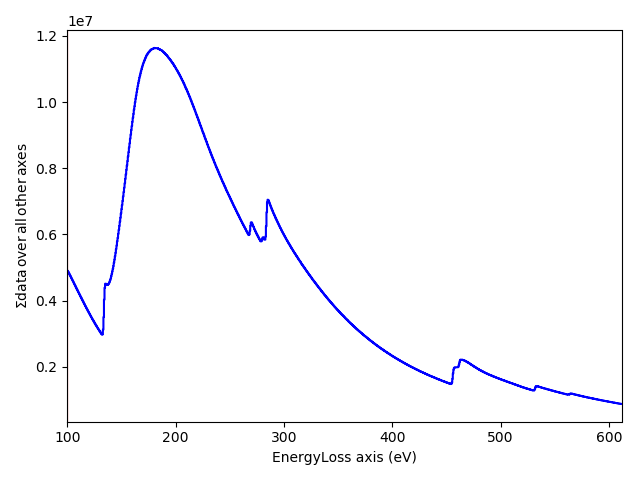

<IPython.core.display.Javascript object>


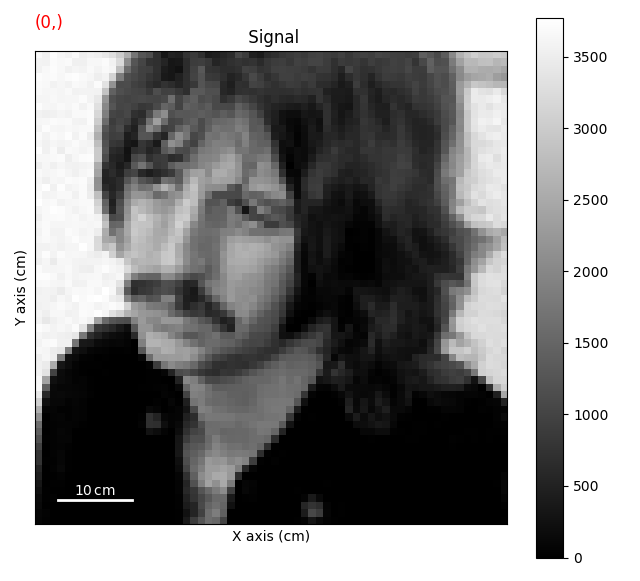

In [24]:
im.plot()

## 8. Saving to file

In [25]:
im.save('CL1_as_image', overwrite=True)

By default HyperSpy writes to the HDF5 file format.

To save to another format you must specify the extension, e.g.:

In [26]:
im.save('CL1_as_image.tif', overwrite=True)

We can load it to verify that we do get back what we saved

In [27]:
im = hs.load('CL1_as_image.tif')

<IPython.core.display.Javascript object>


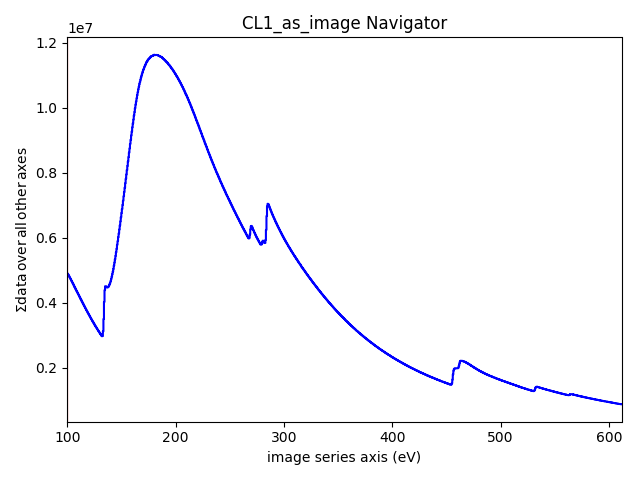

<IPython.core.display.Javascript object>


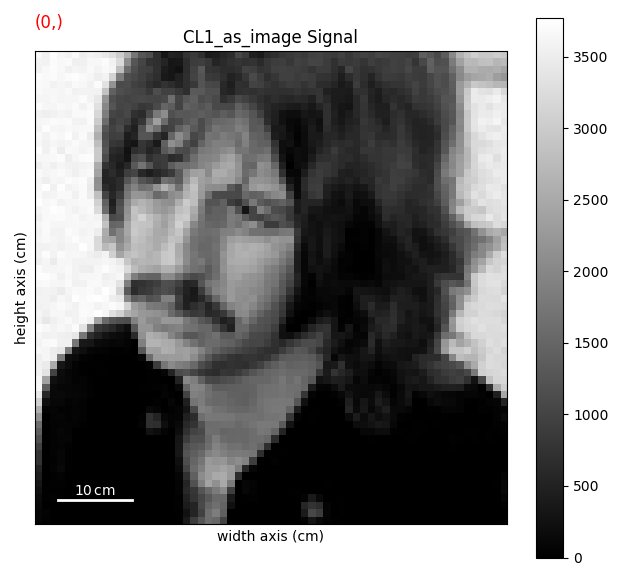

In [28]:
im.plot()

## 9. Indexing

HyperSpy signals can be indexed using the `isig` and `inav` attributes. Indexing is a very powerful feature. To go beyond the basic examples here have a look at the [User Guide](http://hyperspy.org/hyperspy-doc/current/user_guide/tools.html#indexing).

Firstly we'll load an RGB image. If you haven't already, create the required astronaut file in the [Appendix](#Appendix).

In [29]:
im2 = hs.load("astronaut.hdf5")

Notice that the navigation dimension is 3 because there is one axis per colour channel.

In [30]:
im2

<Signal2D, title: , dimensions: (3|512, 512)>

Let's plot the three channels:

<IPython.core.display.Javascript object>


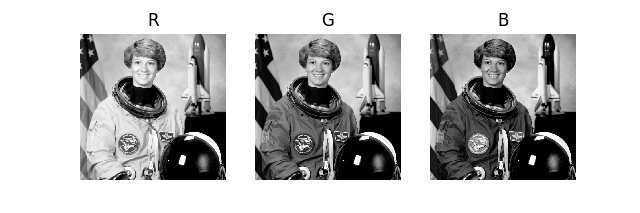

In [31]:
hs.plot.plot_images(im2, axes_decor="off", colorbar=False, label=["R", "G", "B"])

We can index the navigation axes using `inav`. For examples to obtain just the image in the first channel (R):

<IPython.core.display.Javascript object>


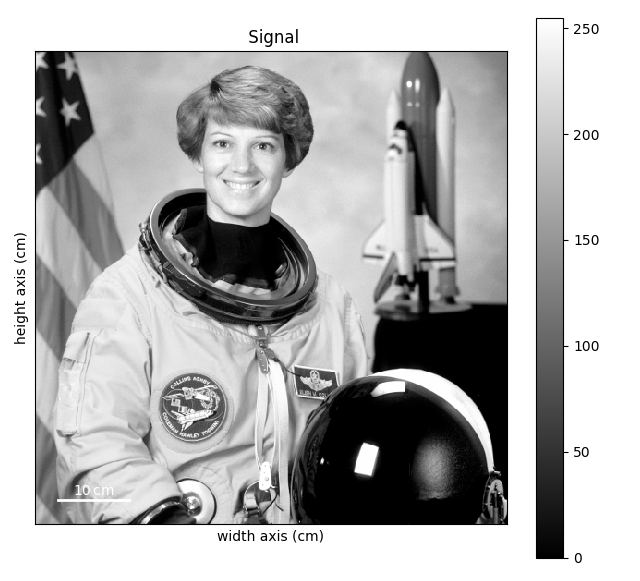

In [32]:
im2.inav[0].plot()

And for the last two channels (G, B)

<IPython.core.display.Javascript object>


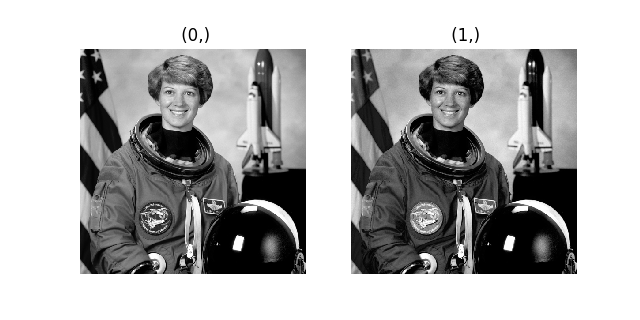

In [33]:
hs.plot.plot_images(im2.inav[1:], axes_decor="off", colorbar=False)

Negative indices are interpreted as counting from the end, so the following is an alternative syntax to obtain the last two channels:

<IPython.core.display.Javascript object>


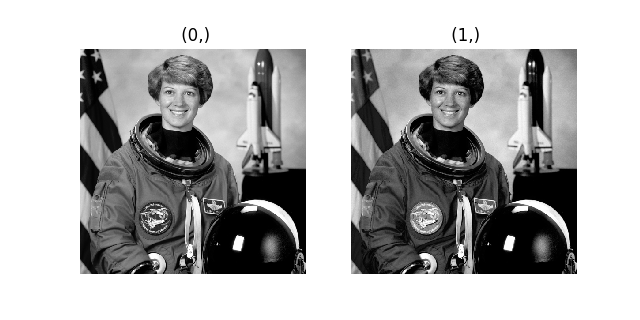

In [34]:
hs.plot.plot_images(im2.inav[-2:], axes_decor="off", colorbar=False)

Equivalently, we can use `isig` to index the signal axes

<IPython.core.display.Javascript object>


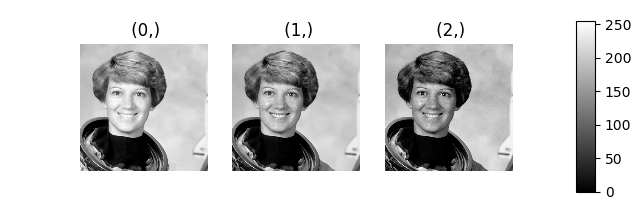

In [35]:
hs.plot.plot_images(im2.isig[128:-128, :-256], axes_decor="off", colorbar="single")

Like most other methods, `isig` and `inav` can be chained e.g.:

<IPython.core.display.Javascript object>


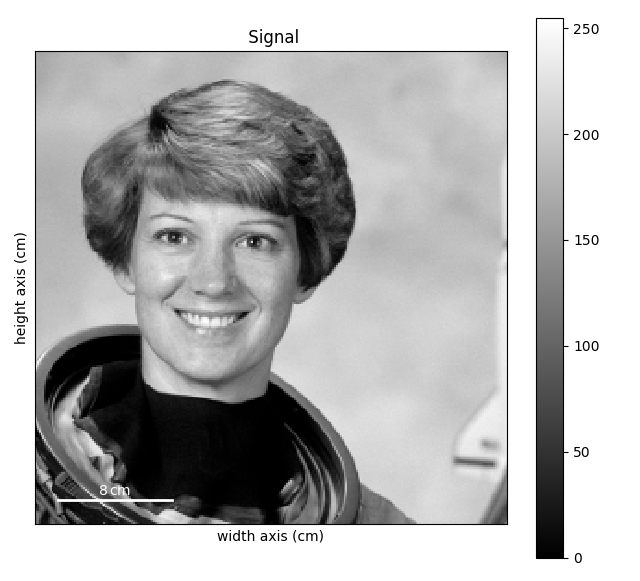

In [36]:
im2.inav[1].isig[128:-128, :-256].plot()

The image is calibrated in centimetres and the centre of the coordinates is located between the astronaut eyes:

<IPython.core.display.Javascript object>


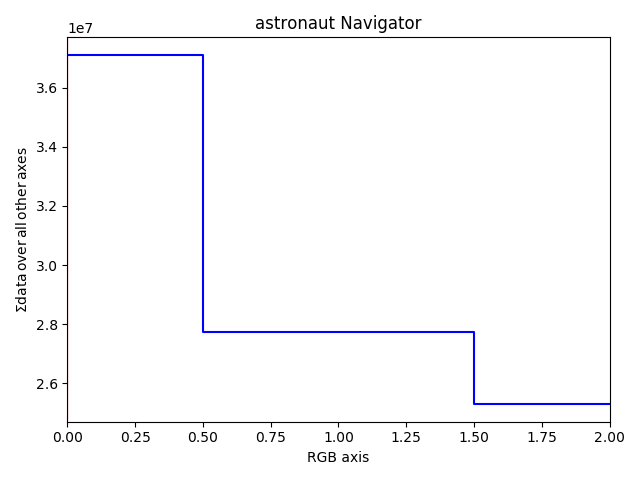

<IPython.core.display.Javascript object>


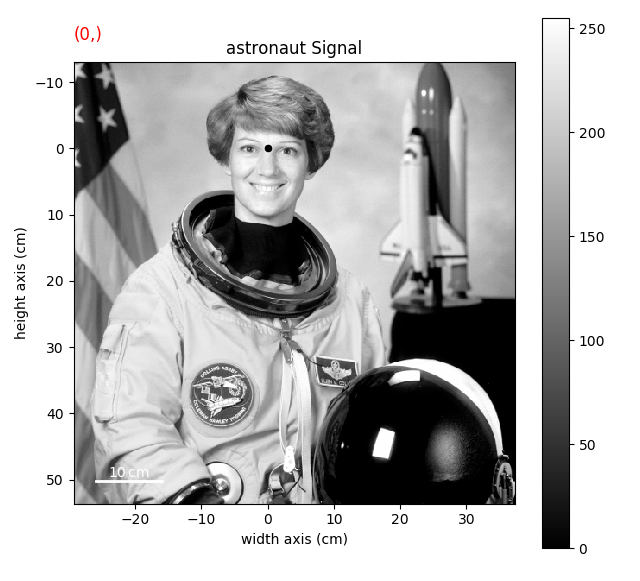

In [37]:
im2.plot(axes_ticks=True)
im2.add_marker(hs.plot.markers.point(0, 0))

HyperSpy signals allow indexing using float numbers to index using the axes calibration instead of data index. For example:

<IPython.core.display.Javascript object>


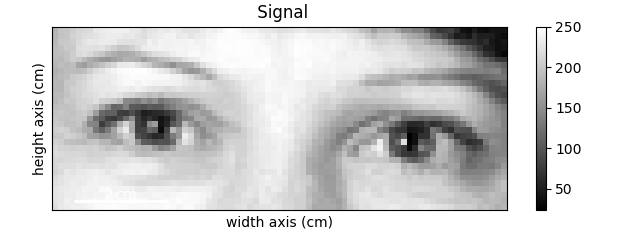

In [38]:
im2.inav[0].isig[-5.:5., -2.:2.].plot()

## 10. Process with external function

The HyperSpy signals contain a number of methods that operate on their data. However, we often need to operate on the data using external functions. HyperSpy provides the `map` method to make it easy to apply external functions to multi-dimensional datasets.

We will use the previous RGB image to show how to apply the `rotate` function from `scipy.ndimage` to an RGB image. Let's import `rotate` and load the image:

In [39]:
from scipy.ndimage import rotate
im3 = hs.load("astronaut.hdf5")
im3

<Signal2D, title: , dimensions: (3|512, 512)>

Notice that this image navigation size is 3 because the navigation axis corresponds to the 3 color channels, R, G and B.

`rotate` can operate on multidimensional images, but the rotation angle must be the same for all images. With HyperSpy we can easily specify the rotation angle for each image by creating a signal of the same navigation dimensions as `im` containing the rotation angle:

In [40]:
angles = hs.signals.BaseSignal([-15, 0, 15])
angles

<BaseSignal, title: , dimensions: (|3)>

`angles` has the right size, but we need to swap the signal and navigation axes. We can do this using `transpose`:

In [41]:
angles.transpose()

<BaseSignal, title: , dimensions: (3|)>

When no arguments are passed to transpose (as in this case) we can use the `T` shortcut instead:

In [42]:
angles.T

<BaseSignal, title: , dimensions: (3|)>

The following uses the map function to rotate each color channel by a different angle using SciPy's rotate function:

In [43]:
im3.map(rotate,
       angle=angles.T,
       reshape=False,)

<IPython.core.display.Javascript object>


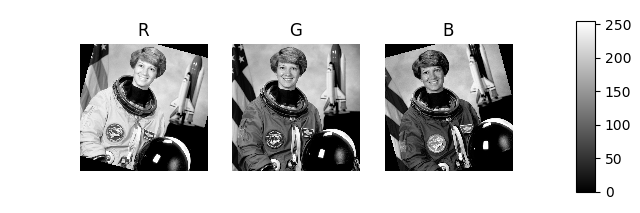

In [44]:
hs.plot.plot_images(im3, label=["R", "G", "B"], axes_decor="off", colorbar="single")

To display the result in colour we need to change the data type to `rgb8`:

<IPython.core.display.Javascript object>


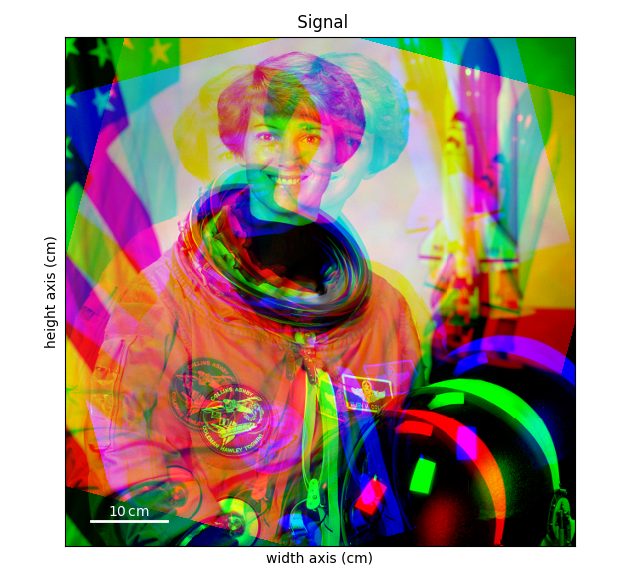

In [45]:
im_rgb = im3.to_signal1D()
im_rgb.change_dtype("rgb8")
im_rgb.plot()

Notice that now there are no navigation axes:

In [46]:
im_rgb

<Signal2D, title: , dimensions: (|512, 512)>

## Appendix

### Create astronaut file for indexing example

In [ ]:
import hyperspy.api as hs
from skimage.data import astronaut
s2 = hs.signals.Signal1D(astronaut())

# Calibrate the image
s2.axes_manager[0].name = "width"
s2.axes_manager[0].scale = 0.13
s2.axes_manager[0].offset = -29.2
s2.axes_manager[0].units = "cm"

s2.axes_manager[1].name = "height"
s2.axes_manager[1].scale = 0.13
s2.axes_manager[1].offset = -12.9
s2.axes_manager[1].units = "cm"

s2.axes_manager[2].name = "RGB"
s2.to_signal2D().save("astronaut.hdf5")

### Download and unpack the machine learning example data

In [ ]:
from urllib.request import urlretrieve, urlopen
from zipfile import ZipFile
files = urlretrieve("https://www.dropbox.com/s/dt6bc3dtg373ahw/machine_learning.zip?raw=1", "./machine_learning.zip")

with ZipFile("machine_learning.zip") as z:
    z.extractall()